<a href="https://colab.research.google.com/github/Ashu156/Image-Processing/blob/master/Image_processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclesperanto-prototype

In [2]:
import pyclesperanto_prototype as cle
from skimage import io, exposure, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [4]:
# Connect to drive
try:
  from google.colab import drive
  drive.mount('/gdrive')
except:
  print('Google Drive is not available.')

Mounted at /gdrive


dtype('float64')

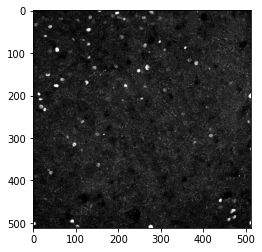

In [5]:
# Load image from gdrive
img = io.imread('/gdrive/MyDrive/deepflash2-paper/data/Amygdala/SD7 TM/MAX_C2-SD7 TM BLA 20X BA 1-1.tif')

# Convert RGB image to a grayscaled image
from skimage.color import rgb2gray
img = rgb2gray(img)

# Show image
plt.imshow(img, cmap='gray')

# Get data type og the image
img.dtype

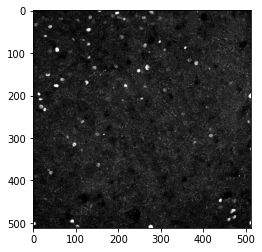

In [6]:
# Convert image to uint8 format from float64
img_8bit = img_as_ubyte(exposure.rescale_intensity(img))

# Show converted image
plt.imshow(img_8bit, cmap='gray')

Available OpenCL devices:['Tesla T4', 'cupy backend (experimental)']
Used GPU:  <Tesla T4 on Platform: NVIDIA CUDA (1 refs)>
Image size in GPU: (512, 512)


/usr/local/lib/python3.7/dist-packages/pyclesperanto_prototype/_tier9/_imshow.py:42: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


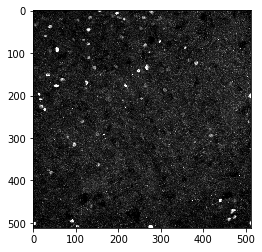

In [7]:
# list names of all available OpenCL-devices
print("Available OpenCL devices:" + str(cle.available_device_names()))

# select a specific OpenCL / GPU device and see which one was chosen
device = cle.select_device('RTX')
print("Used GPU: ", device)

#Push the image to gpu memory
img_gpu = cle.push(img)
print("Image size in GPU: " + str(img_gpu.shape))


cle.imshow(img_gpu, color_map='gray')

In [ ]:
# Define the window size
windowsize_r = 128
windowsize_c = 128
img_blocks = []
# Crop out the window and calculate the histogram
for r in range(0,img.shape[0] - windowsize_r, windowsize_r):
    for c in range(0,img.shape[1] - windowsize_c, windowsize_c):
        roi = img[r:r+windowsize_r,c:c+windowsize_c]
        img_blocks.append(roi)
        

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 10))

for j in range(0, len(img_blocks)):
  plt.figure()
  plt.imshow(img_blocks[j])

In [ ]:
import ipywidgets as widgets
from IPython.display import display
x = 5
slider = widgets.IntSlider()
slider.value = x
def on_change(v):
    x = v['new'] 
slider.observe(on_change, names='value')
display(slider)
x

IntSlider(value=5)

5

In [ ]:
!pip install image-slicer
!pip install Pillow

import cv2
import numpy as np
from matplotlib import pyplot as plt
#from scipy.misc import imsave
from scipy import ndimage
from scipy import misc
import scipy.misc
import scipy
import image_slicer
from image_slicer import join
from PIL import Image
img.shape

In [ ]:
num_tiles = 16
filepath = '/gdrive/MyDrive/MAX_C2-SD2 BLA 20X 1-1.tif'
tiles = image_slicer.slice(filepath, num_tiles)

tiles

#for j in range(0, num_tiles):
  #plt.figure()
  #plt.imshow(tiles(j))

In [ ]:
image_slicer.save_tiles(tiles, directory='/gdrive/MyDrive/',\
                            prefix='slice', format='png')
#for tile in tiles:
    #img_tile = io.imread(tiles[j])
    #plt.figure()
    #plt.imshow(img_tile)


dtype('float64')

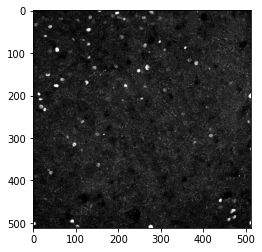

In [8]:
# Load image from gdrive
img = io.imread('/gdrive/MyDrive/deepflash2-paper/data/Amygdala/SD7 TM/MAX_C2-SD7 TM BLA 20X BA 1-1.tif')

# Convert RGB image to a grayscaled image
from skimage.color import rgb2gray
img = rgb2gray(img)

# Show image
plt.imshow(img, cmap='gray')
img.dtype

In [10]:
# Step 1: heavy gaussian blur the image (e.g., sigma=12) and detect maxima for each nuclei
# heavy gaussian blurring assists in detecting maxima that reflects the objects.
#If objects are closer, you may want to decrease the amount of blurring.

from ipywidgets import interact, interactive
import ipywidgets as widgets

def heavy_gaussian_blur(x,y):
  img_gaussian = cle.gaussian_blur(img, sigma_x = x, sigma_y = x, sigma_z = x)
  img_maxima_locations = cle.detect_maxima_box(img_gaussian, radius_x=y, radius_y=y, radius_z=y)
  fig, axs = plt.subplots(1, 2, figsize=(15, 15))
  cle.imshow(img, plot=axs[0], color_map='gray')
  cle.imshow(img_maxima_locations, plot=axs[1], color_map='gray')
  # Number of maxima locations (= number of objects)
# This number depend on the amount of Gaussian blur
  number_of_maxima_locations = cle.sum_of_all_pixels(img_maxima_locations)
  print("number of detected maxima locations", number_of_maxima_locations)
  return img_gaussian
  return img_maxima_locations
  return number_of_maxima_locations
  
# interactive(heavy_gaussian_blur, x=(0.0, 15.0), y=(0.0, 10.0))
interactive_plot = interactive(heavy_gaussian_blur, x=(0.0, 15.0), y=(0.0, 10.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=7.5, description='x', max=15.0), FloatSlider(value=5.0, description='y…

In [11]:
#Step 2: threshold the input image after applying light gaussian blur (e.g., sigma=1)

def light_gaussian_blur(x):
  img_gaussian2 = cle.gaussian_blur(img, sigma_x=x, sigma_y=x, sigma_z=x)
  img_thresh = cle.threshold_otsu(img_gaussian2)

  fig, axs = plt.subplots(1, 2, figsize=(15, 15))
  cle.imshow(img_gaussian2, plot=axs[0], color_map='gray')
  cle.imshow(img_thresh, plot=axs[1], color_map='gray')

  return img_gaussian2
  return img_thresh

interactive_plot = interactive(light_gaussian_blur, x=(0.0, 5.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='x', max=5.0), Output()), _dom_classes=('widget-inter…

number of relevant maxima locations 2805.0


/usr/local/lib/python3.7/dist-packages/pyclesperanto_prototype/_tier9/_imshow.py:42: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


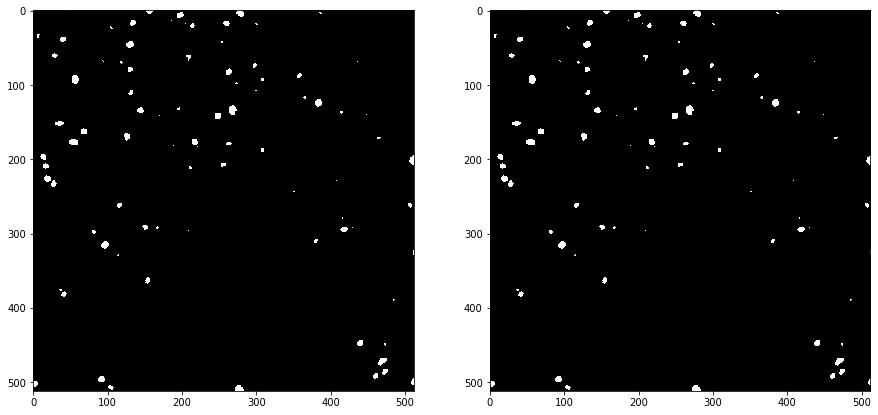

In [12]:
#Step 3: Exclude maxima locations from the background, to make sure we only include the ones from nuclei
# We can do this by using binary and operation
# img_relevant_maxima = cle.binary_and(img_thresh, img_maxima_locations)

img_gaussian2 = cle.gaussian_blur(img, sigma_x=1.0, sigma_y=1.0, sigma_z=1.0)
img_thresh = cle.threshold_otsu(img_gaussian2) 
img_relevant_maxima = img_thresh
number_of_relevant_maxima_locations = cle.sum_of_all_pixels(img_relevant_maxima)
print("number of relevant maxima locations", number_of_relevant_maxima_locations)


fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img_thresh, plot=axs[0], color_map='gray')
cle.imshow(img_relevant_maxima, plot=axs[1], color_map='gray')

/usr/local/lib/python3.7/dist-packages/pyclesperanto_prototype/_tier9/_imshow.py:42: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


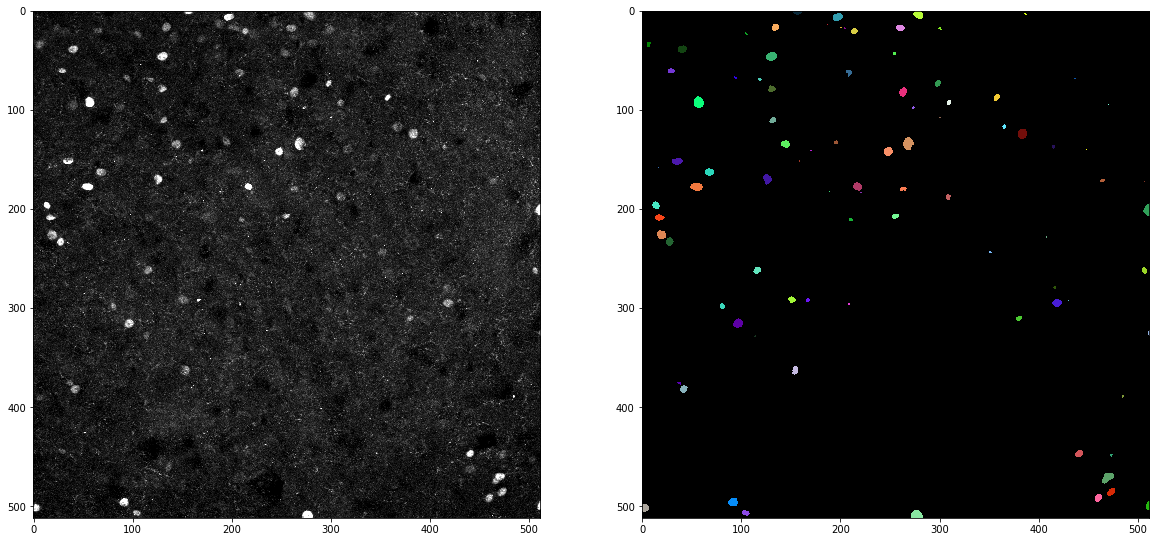

In [18]:
#Step 4: Separate maxima locations into labels using masked voronoi
voronoi_separation = cle.masked_voronoi_labeling(img_relevant_maxima, img_thresh)

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
cle.imshow(img, plot=axs[0], color_map='gray')
cle.imshow(voronoi_separation, labels=True, plot=axs[1])

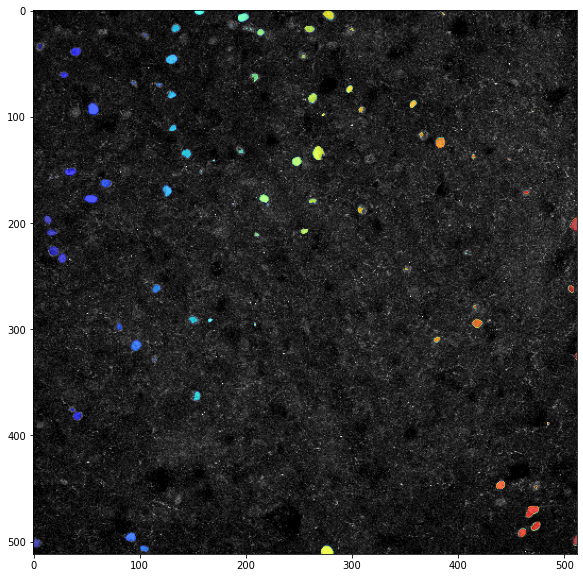

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(img, cmap = 'gray')
plt.imshow(voronoi_separation, cmap = 'jet', alpha=0.7*(voronoi_separation>0))

/usr/local/lib/python3.7/dist-packages/pyclesperanto_prototype/_tier9/_imshow.py:42: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


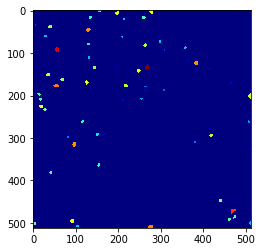

In [27]:
#Useful plotting within cle
#Pixel count map - map by object size
pixel_count_map = cle.label_pixel_count_map(voronoi_separation)
cle.imshow(pixel_count_map, color_map='jet')


In [31]:
voronoi_separation[0]

cl.OCLArray([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 34,
       34, 34, 34, 34, 34, 34, 34, 34, 34,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 

In [ ]:
# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_thresh,cv2.MORPH_OPEN,kernel, iterations = 2)